## Polygon object attributes and methods

In this notebook we will create polygon object using shapely library and then get information about the polygon using its attributes and methods. Let us start with creating a simple Polygon object.

In [5]:
from shapely.geometry import shape
import json
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon
import folium

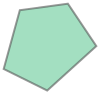

In [2]:
geom_json = { "type": "MultiPolygon", "coordinates": [ [ [ [ 77.590084271641217, 12.949233234213203 ], [ 77.585258087059529, 12.9316458012607 ], [ 77.598267802018924, 12.925203582405512 ], [ 77.612956189876286, 12.9384968673929 ], [ 77.604457908330232, 12.951175955937693 ], [ 77.590084271641217, 12.949233234213203 ] ] ] ] }
geom_polygon_object = shape(geom_json)
geom_polygon_object

Let us add a basemap and overlay our polygon on top of it to see where the polygon is drawn in geographic context. We will use folium to add the map.

In [14]:
m = folium.Map(location=[geom_polygon_object.centroid.y, geom_polygon_object.centroid.x], zoom_start=13)
folium.GeoJson(geom_polygon_object, name="geojson").add_to(m)
m

Let us find the area of the polygon we have created above. 

In [17]:
geom_polygon_object.area

0.000460198041351943

Well the area here does not seems to be looking right since it looks like a pretty large area on map. Well the unit of area is in degrees, same as we have in the coordinate system. To get the area in more meaningful unit such as metric system can either convert the area into metric system directly or reproject the polygon into a projection system which use metric units for coordinates. Let us first inspect the projection of the polygon. shapely does not have capbility to set and store the CRS for any geometry object but we can transform coordinates using pyproj package. 

In [26]:
# 1 degree = 111km approximately 
print("Area in sqkm:", geom_polygon_object.area * 111 * 111)

Area in sqkm: 5.67010006749729


In [21]:
import pyproj
from shapely.ops import transform

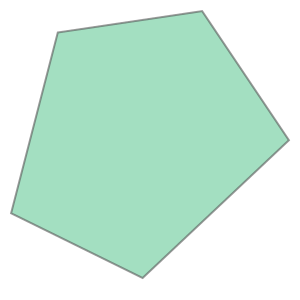

In [23]:
wgs84 = pyproj.CRS('EPSG:4326') #original 
utm = pyproj.CRS('EPSG:32643') #utm

project = pyproj.Transformer.from_crs(wgs84, utm, always_xy=True).transform
utm_geom_polygon_object = transform(project, geom_polygon_object)
utm_geom_polygon_object

Let us recalculate the area again. 

In [31]:
print("Difference in Area calculated by two methods (SQKM):",  utm_geom_polygon_object.area/1e6 - geom_polygon_object.area * 111 * 111)

Difference in Area calculated by two methods (SQKM): -0.13917023312696397
